In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('Input Files/auto-mpg.csv')

In [3]:
dataset

MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  \
0     8.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     Model_year  Origin                   Car_Name  
0          2015       1  chevrolet chevelle malibu  
1          2015       1          buick skylark 320  
2          2015       1         plymouth satellite  
3          2015       1              amc rebel sst  
4          2015       1                ford torino  
..          ...     ...                        ...  
393        2003       1            ford mustang gl  
394        2003       2                  vw pickup  
395        2003       1              dodge rampage  
396        2003       1                ford ranger  
397        2003       1                 chevy s-10  

[398 rows x 9 columns]

In [4]:
dataset.shape

(398, 9)

In [5]:
dataset.describe()

MPG   Cylinders  Displacement       Weight  Acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.489447    5.454774    193.425879  2970.424623     15.568090   
std      7.849757    1.701004    104.269838   846.841774      2.757689   
min      8.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.125000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

        Model_year      Origin  
count   398.000000  398.000000  
mean   2008.989950    1.572864  
std       3.697627    0.802055  
min    2003.000000    1.000000  
25%    2006.000000    1.000000  
50%    2009.000000    1.000000  
75%    2012.000000    2.000000  
max    2015.000000    3.000000

In [6]:
X = dataset['Acceleration'].values.reshape(-1,1)
y = dataset['MPG'].values.reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
regressor = LinearRegression()  
 #training the algorithm
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2.45247591]
[[1.34812315]]


In [10]:
y_pred = regressor.predict(X_test)

In [11]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

Actual  Predicted
0     14.0  19.978077
1     25.0  25.370569
2     13.0  24.022446
3     21.0  28.740877
4     18.0  23.348385
..     ...        ...
75    30.9  22.000262
76    26.0  26.988317
77    32.0  28.066816
78    24.5  32.245997
79    11.0  17.281831

[80 rows x 2 columns]

In [12]:
#R2 = 1 - RSS/TSS
#Residual Sum of Squares and 
accuracy  =regressor.score(X_test,y_test)

In [13]:
accuracy

0.019020265049206175

In [15]:
df1 = df.head(15)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

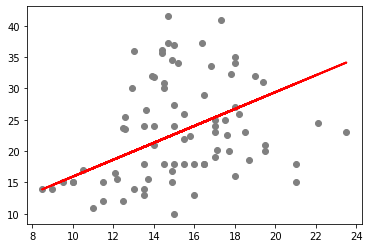

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()